In [70]:
import pandas as pd

# Load the dataset
file_path = 'F1_race_results.csv'
race_results = pd.read_csv(file_path)

# Summary statistics for numerical columns
summary_stats = race_results[['LAPS', 'Total_Seconds', 'Hours', 'Minutes', 'Seconds']].describe()

# Display the summary statistics
print(summary_stats)


              LAPS  Total_Seconds        Hours      Minutes      Seconds
count  1115.000000    1115.000000  1115.000000  1115.000000  1115.000000
mean     64.652915    6354.896502     1.214350    32.559641    29.658296
std      20.208311    1651.506046     0.501139    13.895635    17.089867
min       3.000000      98.000000     0.000000     0.000000     0.000000
25%      54.000000    5435.000000     1.000000    25.000000    15.000000
50%      65.000000    5888.000000     1.000000    33.000000    30.000000
75%      72.000000    6792.500000     1.000000    41.000000    45.000000
max     200.000000   14679.000000     4.000000    59.000000    59.000000


In [71]:
# We can see that there have been a total of 1115 races as of 08/01/2024
# On average a race is usually about 64.7 laps
# We can see the shortest race on record was 3 laps and the longest race on record was 200 laps

In [72]:
# Let's take a look at the mean, median, and mode for number of laps per race and total times for races

In [73]:
import pandas as pd
from scipy import stats

# Calculate mean, median, and mode for numerical columns
mean_values = race_results[['LAPS', 'Total_Seconds', 'Hours', 'Minutes', 'Seconds']].mean()
median_values = race_results[['LAPS', 'Total_Seconds', 'Hours', 'Minutes', 'Seconds']].median()
mode_values = race_results[['LAPS', 'Total_Seconds', 'Hours', 'Minutes', 'Seconds']].mode().iloc[0]

# Combine the results into a single DataFrame
central_tendency = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values
})

# Display the DataFrame
print("Measures of Central Tendency")
print(central_tendency)


Measures of Central Tendency
                      Mean  Median    Mode
LAPS             64.652915    65.0    53.0
Total_Seconds  6354.896502  5888.0  5258.0
Hours             1.214350     1.0     1.0
Minutes          32.559641    33.0    31.0
Seconds          29.658296    30.0    11.0


In [74]:
# We can see that  Formula 1 races average 64.7 laps
# We can also see that the most common amount of laps per race has historically been 53 laps

In [75]:
# Let's take a look at the measures of dispersion. 
# We will look at range, standard deviation, variance, and mean absolute deviation.

In [76]:

# Calculate measures of dispersion for numerical columns
range_values = race_results[['LAPS', 'Total_Seconds', 'Hours', 'Minutes', 'Seconds']].max() - race_results[['LAPS', 'Total_Seconds', 'Hours', 'Minutes', 'Seconds']].min()
std_values = race_results[['LAPS', 'Total_Seconds', 'Hours', 'Minutes', 'Seconds']].std()
var_values = race_results[['LAPS', 'Total_Seconds', 'Hours', 'Minutes', 'Seconds']].var()
mad_values = race_results[['LAPS', 'Total_Seconds', 'Hours', 'Minutes', 'Seconds']].apply(lambda x: (x - x.mean()).abs().mean())

# Combine the results into a single DataFrame
dispersion_measures = pd.DataFrame({
    'Range': range_values,
    'Standard Deviation': std_values,
    'Variance': var_values,
    'Mean Absolute Deviation': mad_values
})

# Display the DataFrame
print("Measures of Dispersion")
print(dispersion_measures)


Measures of Dispersion
                 Range  Standard Deviation      Variance  \
LAPS             197.0           20.208311  4.083758e+02   
Total_Seconds  14581.0         1651.506046  2.727472e+06   
Hours              4.0            0.501139  2.511404e-01   
Minutes           59.0           13.895635  1.930887e+02   
Seconds           59.0           17.089867  2.920636e+02   

               Mean Absolute Deviation  
LAPS                         13.135463  
Total_Seconds              1129.613641  
Hours                         0.361283  
Minutes                      10.782367  
Seconds                      14.790486  


In [77]:
# We can see that the number of laps can vary by 197.
# Our Standard deviation tells us that the number of laps in races can vary by about 20 laps from the average of 64.7.
# Our variance of 408.37 tells us that there is a moderate spread in the number of laps across different races.
# Our mean absolute deviation gives us a more moderate average deviation of 13.13.

In [78]:
# Let's create histograms and box plots for each of the numerical columns
# This will provide a visual understanding of their distributions

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

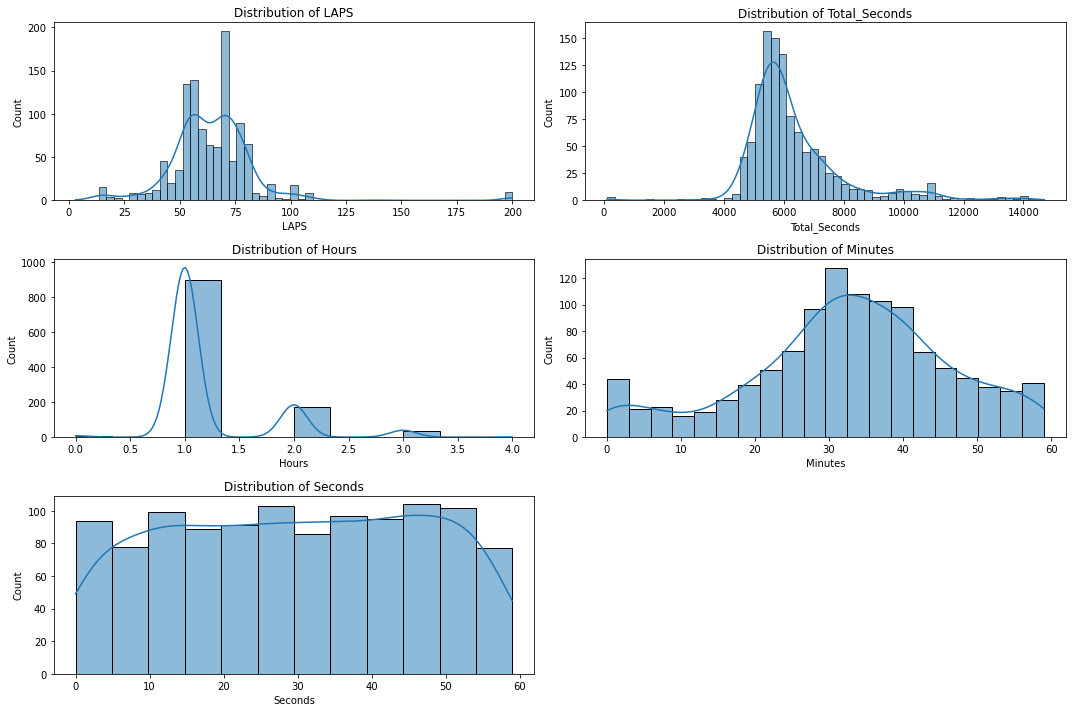

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'F1_race_results.csv'
race_results = pd.read_csv(file_path)

# Convert infinite values to NaNs
race_results.replace([float('inf'), float('-inf')], pd.NA, inplace=True)

# Drop NaN values in numerical columns
numerical_columns = ['LAPS', 'Total_Seconds', 'Hours', 'Minutes', 'Seconds']
race_results = race_results.dropna(subset=numerical_columns)

# Plot histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 2, i + 1)
    sns.histplot(race_results[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()



In [109]:
# Distribution of laps - We can see if most races have a similar number of laps or if there is a wide variety. 
# Distribution of Total_seconds - We can identify common race durations and skewness.
# Distribution of Hours, Minutes, Seconds - We can see how race times are distributed across hours, minutes, and seconds
# If a histogram is symmetric and bell-shaped, the data is likely normally distributed. Skewness indicates asymmetry
# Wide histograms or large IQRs in box plots suggest high variability in race characteristics
# Outliers in box plots promote further investigation into those specific races to understand why they deviate significantly

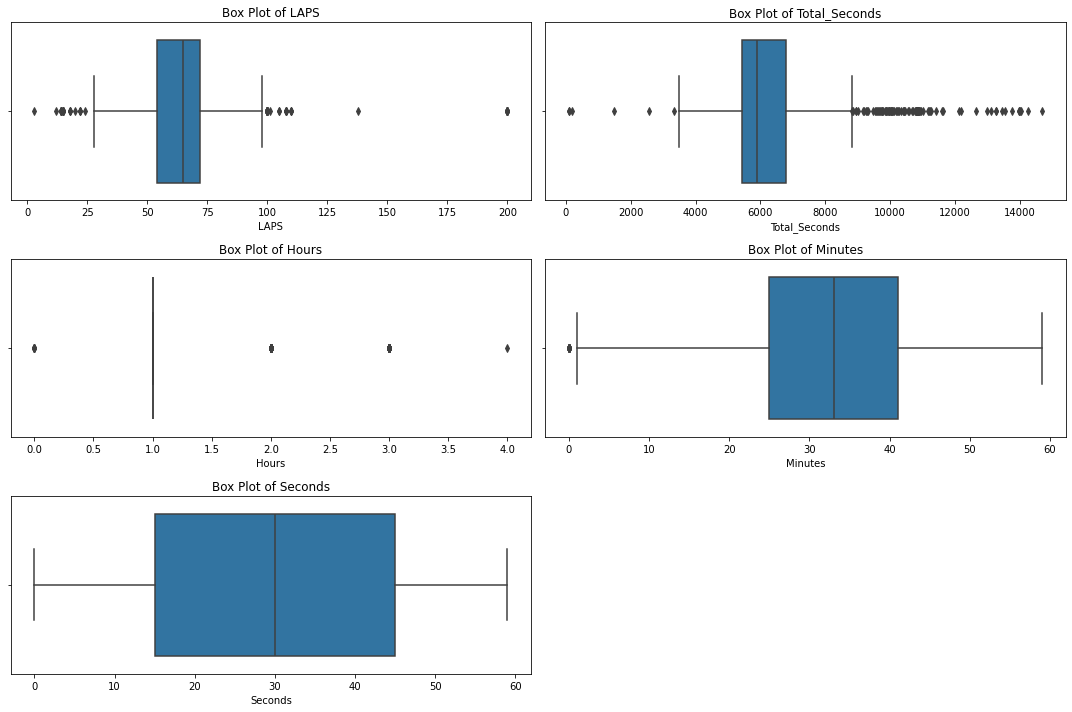

In [110]:
# Plot box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=race_results[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

In [111]:
# Box Plot of Laps highlights the central tendency(median laps per race), spread(IQR), and outliers(races with unusually high or low laps)
# Box Plot of Total_seconds provides us with a quick view of typical race times and highlights any outliers with exceptionally long or short durations
# Box Plot of Hours, Minutes, Seconds - We can summarize the central tendencies and variability in each time component, making it easy to identify outliers

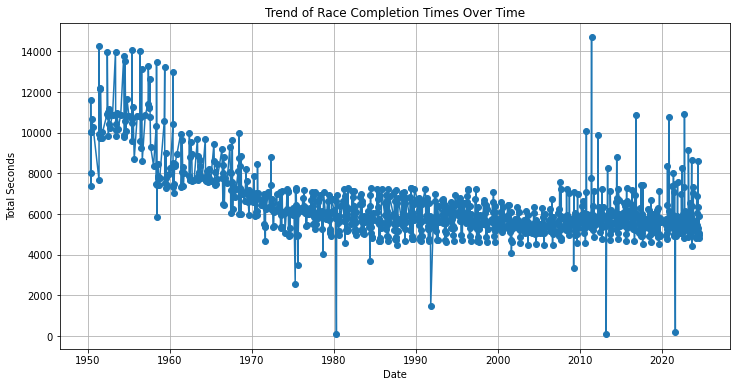

In [112]:
# Convert DATE column to datetime
race_results['DATE'] = pd.to_datetime(race_results['DATE'])

# Plot Total_Seconds over DATE
plt.figure(figsize=(12, 6))
plt.plot(race_results['DATE'], race_results['Total_Seconds'], marker='o', linestyle='-')
plt.title('Trend of Race Completion Times Over Time')
plt.xlabel('Date')
plt.ylabel('Total Seconds')
plt.grid(True)
plt.show()

In [113]:
# The time series chart shows the trend of race completion times over the years, from 1950 to the present. 
# We can see that there was high variability in race completion times in the 1950's.
# This could potentially be due to different race lengths, track conditions, or technological differences in cars.
# There was a general downward trend in race completion times from the 1950's - 1980's. 
# This trend suggests that improvements in car technology, race strategies, and track conditions lead to faster races.
# From the 1990s onwards, race times began to stabilize but still show some variability.
# The variability could be attributed to different race tracks, weather conditions, and racing regulations

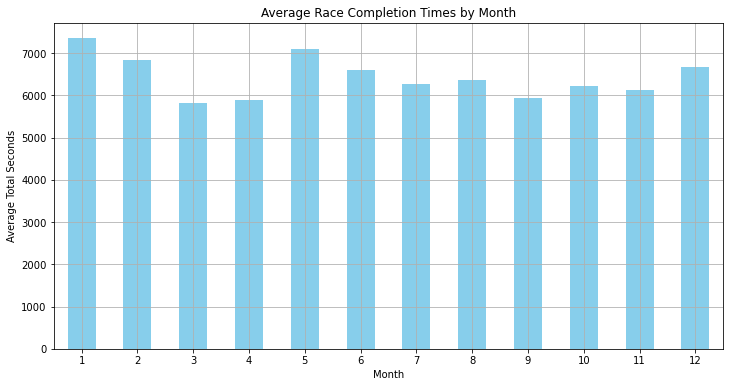

In [114]:
# Ensure DATE column is in datetime format
race_results['DATE'] = pd.to_datetime(race_results['DATE'])

# Extract month from the DATE column
race_results['Month'] = race_results['DATE'].dt.month

# Aggregate data by month to get the mean of Total_Seconds
monthly_avg = race_results.groupby('Month')['Total_Seconds'].mean()

# Plot the monthly average race completion times
plt.figure(figsize=(12, 6))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Average Race Completion Times by Month')
plt.xlabel('Month')
plt.ylabel('Average Total Seconds')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

In [115]:
# The bar charts show the average race completion times aggregated by month
# There are visible differences in average race times across different months (some months have noticeably higher or lower average completion times).
# Racing calendar: The positioning of races within the season could influence performance (e.g., early-season races might see more conservative strategies).

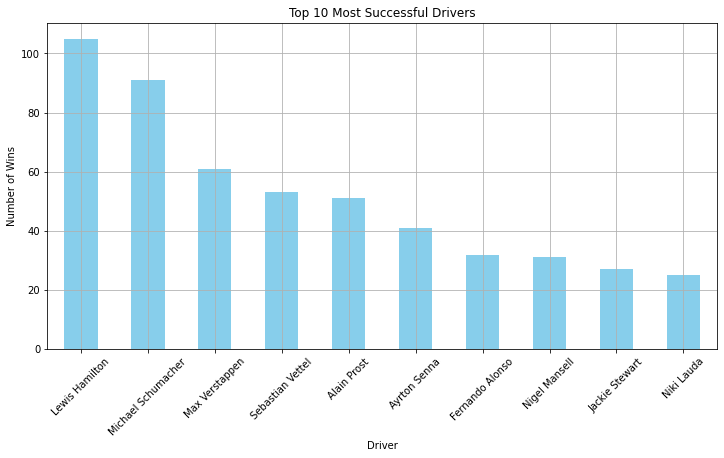

In [116]:
# Convert DATE column to datetime
race_results['DATE'] = pd.to_datetime(race_results['DATE'])

# Winners' Analysis
# Count the number of wins for each driver
driver_wins = race_results['WINNER'].value_counts()

# Count the number of wins for each team
team_wins = race_results['CAR'].value_counts()

# Plot the most successful drivers
plt.figure(figsize=(12, 6))
driver_wins.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Successful Drivers')
plt.xlabel('Driver')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


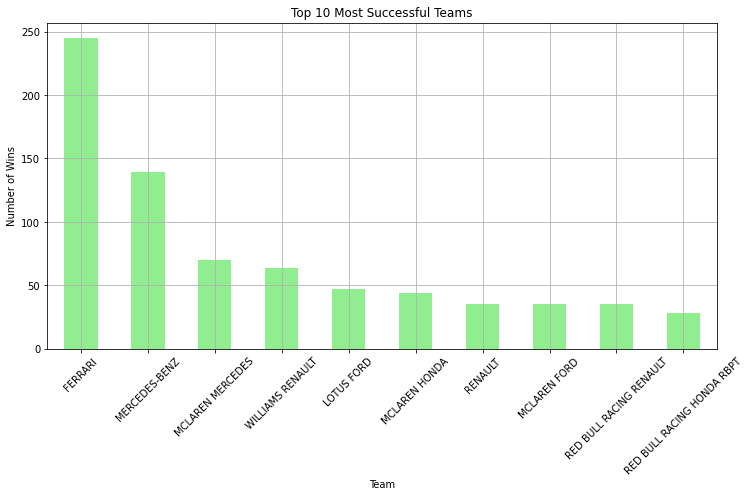

In [117]:
# Plot the most successful teams
plt.figure(figsize=(12, 6))
team_wins.head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Most Successful Teams')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [118]:
# Number of wins for each car
car_wins = race_results['CAR'].value_counts()

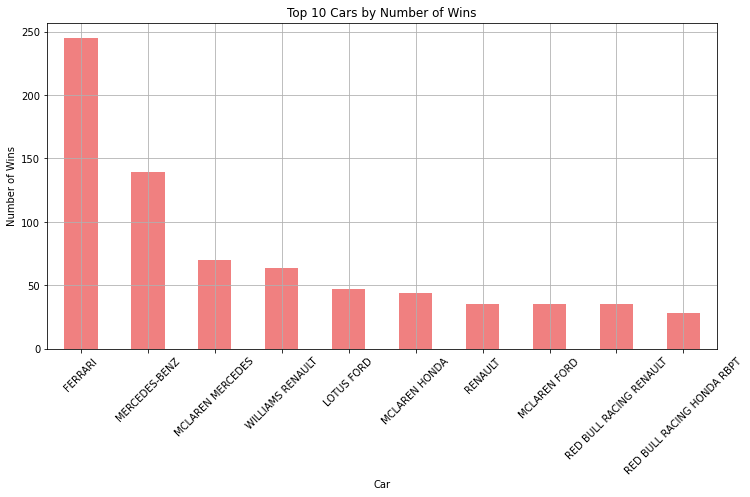

In [119]:
# Plot the number of wins for each car
plt.figure(figsize=(12, 6))
car_wins.head(10).plot(kind='bar', color='lightcoral')
plt.title('Top 10 Cars by Number of Wins')
plt.xlabel('Car')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [120]:
# Convert DATE column to datetime
race_results['DATE'] = pd.to_datetime(race_results['DATE'])

# Grand Prix Analysis
# Calculate average race time for each Grand Prix
gp_avg_time = race_results.groupby('GRAND PRIX')['Total_Seconds'].mean().sort_values()


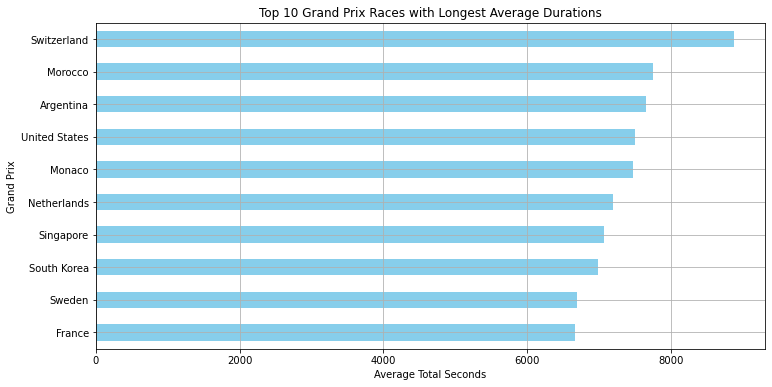

In [121]:
# Plot the Grand Prix races with the longest average durations
plt.figure(figsize=(12, 6))
gp_avg_time.tail(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Grand Prix Races with Longest Average Durations')
plt.xlabel('Average Total Seconds')
plt.ylabel('Grand Prix')
plt.grid(True)
plt.show()

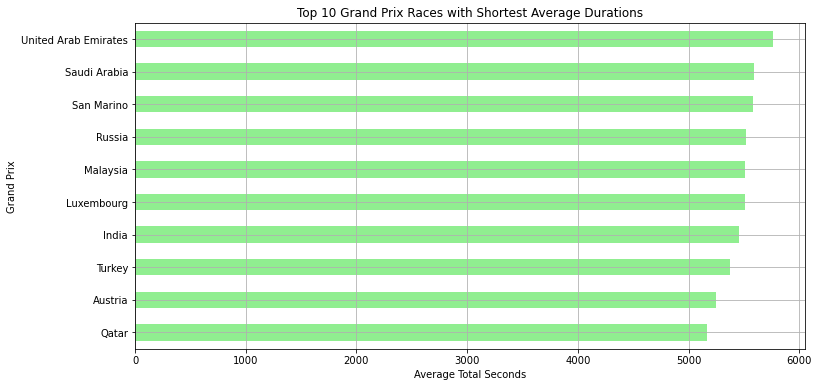

In [122]:
# Plot the Grand Prix races with the shortest average durations
plt.figure(figsize=(12, 6))
gp_avg_time.head(10).plot(kind='barh', color='lightgreen')
plt.title('Top 10 Grand Prix Races with Shortest Average Durations')
plt.xlabel('Average Total Seconds')
plt.ylabel('Grand Prix')
plt.grid(True)
plt.show()

In [123]:
# Laps Comparison
# Calculate average number of laps for each Grand Prix
gp_avg_laps = race_results.groupby('GRAND PRIX')['LAPS'].mean().sort_values()


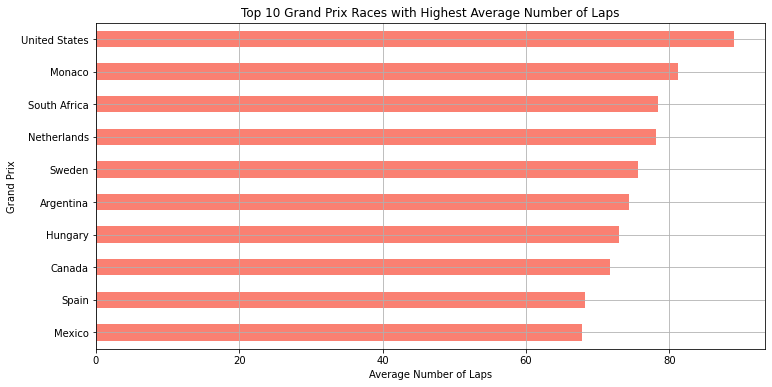

In [124]:
# Plot the Grand Prix races with the highest average number of laps
plt.figure(figsize=(12, 6))
gp_avg_laps.tail(10).plot(kind='barh', color='salmon')
plt.title('Top 10 Grand Prix Races with Highest Average Number of Laps')
plt.xlabel('Average Number of Laps')
plt.ylabel('Grand Prix')
plt.grid(True)
plt.show()

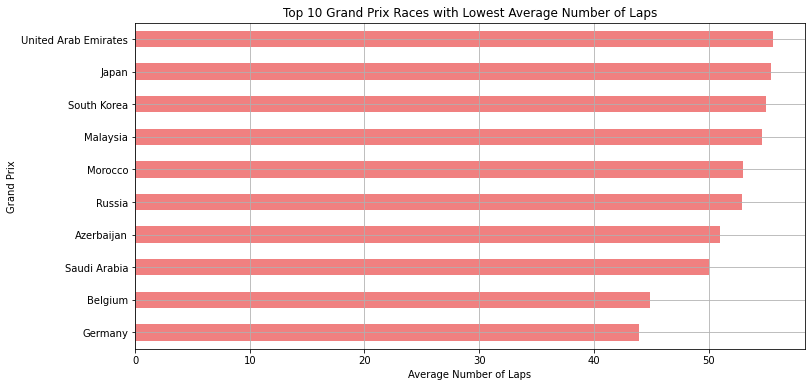

In [125]:
# Plot the Grand Prix races with the lowest average number of laps
plt.figure(figsize=(12, 6))
gp_avg_laps.head(10).plot(kind='barh', color='lightcoral')
plt.title('Top 10 Grand Prix Races with Lowest Average Number of Laps')
plt.xlabel('Average Number of Laps')
plt.ylabel('Grand Prix')
plt.grid(True)
plt.show()

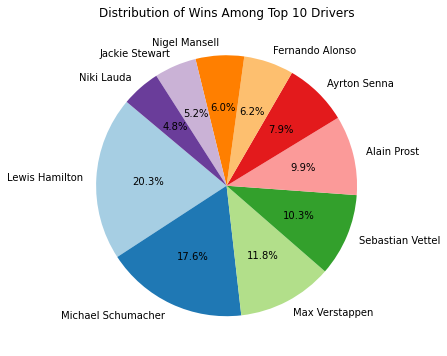

In [126]:
# Plot pie chart for the distribution of wins among drivers
plt.figure(figsize=(12, 6))
driver_wins.head(10).plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(10)))
plt.title('Distribution of Wins Among Top 10 Drivers')
plt.ylabel('')  # Hide the y-label
plt.show()

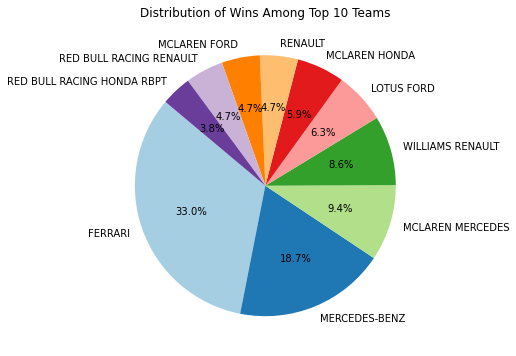

In [127]:
# Plot pie chart for the distribution of wins among cars
plt.figure(figsize=(12, 6))
team_wins.head(10).plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(10)))
plt.title('Distribution of Wins Among Top 10 Teams')
plt.ylabel('')  # Hide the y-label
plt.show()

In [128]:
# Lets run a Z test, T test, and F test

In [129]:
import numpy as np
import statsmodels.api as sm

# Define two groups for comparison, for example, races before and after 2000
group1 = race_results[race_results['DATE'].dt.year < 2000]['LAPS']
group2 = race_results[race_results['DATE'].dt.year >= 2000]['LAPS']

# Perform Z-test
z_test_result = sm.stats.ztest(group1, group2)

print("Z-Test Result:")
print(f"Z-statistic: {z_test_result[0]}, P-value: {z_test_result[1]}")


Z-Test Result:
Z-statistic: 5.498967421063707, P-value: 3.820217019765023e-08


In [130]:
# We can see the difference between the mean number of laps before and after 2000 is 5.499 standard deviations away from zero.
# The p-value is 3.82*10^-8 which is an extremely low p-value. 
# We can confidently conclude that there is a significant difference in the number of laps in races before and after 2000. 
# The difference is not due to random variation but likely reflects the real changes in the race characteristics.

In [131]:
from scipy.stats import ttest_ind

# Define two groups for comparison, for example, races before and after 2000
group1 = race_results[race_results['DATE'].dt.year < 2000]['Total_Seconds']
group2 = race_results[race_results['DATE'].dt.year >= 2000]['Total_Seconds']

# Perform T-test
t_test_result = ttest_ind(group1, group2)

print("T-Test Result:")
print(f"T-statistic: {t_test_result.statistic}, P-value: {t_test_result.pvalue}")


T-Test Result:
T-statistic: 11.265462269247006, P-value: 5.929231770244547e-28


In [132]:
from scipy.stats import f_oneway

# Define two groups for comparison, for example, races in different decades
group1 = race_results[race_results['DATE'].dt.year < 2000]['LAPS']
group2 = race_results[race_results['DATE'].dt.year >= 2000]['LAPS']

# Perform F-test
f_test_result = f_oneway(group1, group2)

print("F-Test Result:")
print(f"F-statistic: {f_test_result.statistic}, P-value: {f_test_result.pvalue}")


F-Test Result:
F-statistic: 30.23864269792001, P-value: 4.736377184160712e-08


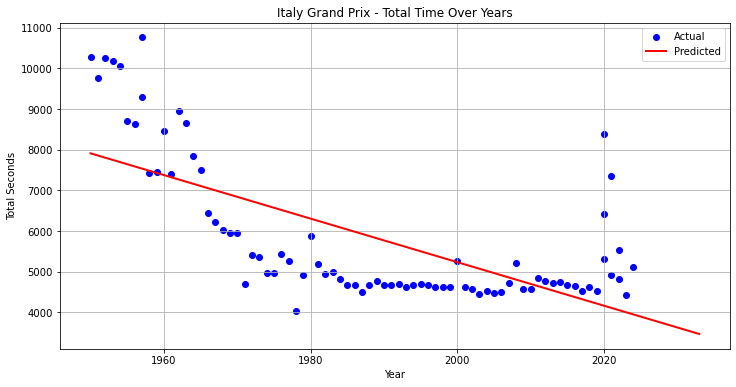

In [133]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming race_results dataframe is already loaded and DATE column is converted to datetime
# Filter the dataset for Italy Grand Prix races
italy_gp = race_results[race_results['GRAND PRIX'] == 'Italy']

# Prepare the data for plotting and prediction
X_italy = italy_gp[['DATE']].copy()
X_italy.loc[:, 'Year'] = X_italy['DATE'].dt.year
y_italy = italy_gp['Total_Seconds']

# Train the linear regression model
model_italy = LinearRegression()
model_italy.fit(X_italy[['Year']], y_italy)

# Predict future values
future_years_italy = pd.DataFrame({'Year': range(X_italy['Year'].min(), X_italy['Year'].max() + 10)})
future_predictions_italy = model_italy.predict(future_years_italy)

# Plot the historical data and the regression line
plt.figure(figsize=(12, 6))
plt.scatter(X_italy['Year'], y_italy, color='blue', label='Actual')
plt.plot(future_years_italy['Year'], future_predictions_italy, color='red', linewidth=2, label='Predicted')
plt.title('Italy Grand Prix - Total Time Over Years')
plt.xlabel('Year')
plt.ylabel('Total Seconds')
plt.legend()
plt.grid(True)
plt.show()



In [134]:
# We can use our lap times from the Italy Grand Prix over time to see if the cars have gotten faster.
# We can see a massive dip in lap times from the 1950s to the 1980s. Since the 1980's the speed of cars has been relatively the same.
# This could potentially be due to the continuous downsizing of engines and horsepower.
# The lap times have been maintained due to the increase of downforce the vehicles have along with improvements in tire technology.